## Integrantes:

- Kevin Pareja (20196318)

- Elian Tongombol (20196453)

- Paola Aranda (20196052)

- María Alejandra Colán (20190515)

In [1]:
import pandas as pd
import numpy as np
import warnings
import pyreadstat  # read .sav files
import pyreadr  # read dataser .Rdata
import re


import seaborn as sns  # seaborn lirbary for plot
import matplotlib.pyplot as plt  # matplot
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

warnings.filterwarnings('ignore') 

## Parte 1

## Producción de hoja de coca por hectáreas

In [2]:
datos_xlsx = pd.read_excel("../../data/produccion_coca/6.1.1_-_Illicit_coca_bush_cultivation.xlsx")
datos_xlsx

,"Global illicit cultivation of coca bush, 2009-2020 (hectares)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2009-01-04 00:00:00,2010-01-04 00:00:00,2011-01-04 00:00:00,2012-01-04 00:00:00,2013-01-05 00:00:00,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bolivia (Plurinational State of),30900,31000,27200,25300,23000,20400.0,20200.0,23100.0,24500.0,23100.0,25500.0,29400.0
4,Colombia a,73000,62000,64000,48000,48000,69000.0,96000.0,146000.0,171000.0,169000.0,154000.0,142800.0
5,Peru b,59900,61200,62500,60400,49800,42900.0,40300.0,43900.0,49900.0,54100.0,54700.0,61800.0
6,Total,163800,154200,153700,133700,120800,132300.0,156500.0,213000.0,245400.0,246200.0,234200.0,234200.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sources: Plurinational State of Bolivia: natio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,a) Net area on 31 December.\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
datos= datos_xlsx.loc[[3,4,5],:]
datos= datos.iloc[:, 1:]
datos= datos.transpose()
datos= datos.rename(columns = {3:"Bolivia", 4:"Colombia", 5:"Peru"})
datos['year'] = pd.to_datetime(range(2009, 2021), format='%Y')
datos.reset_index(drop = True, inplace = True)
datos

,Bolivia,Colombia,Peru,year
0,30900,73000,59900,2009-01-01
1,31000,62000,61200,2010-01-01
2,27200,64000,62500,2011-01-01
3,25300,48000,60400,2012-01-01
4,23000,48000,49800,2013-01-01
5,20400.0,69000.0,42900.0,2014-01-01
6,20200.0,96000.0,40300.0,2015-01-01
7,23100.0,146000.0,43900.0,2016-01-01
8,24500.0,171000.0,49900.0,2017-01-01
9,23100.0,169000.0,54100.0,2018-01-01


Text(16000, -50000, 'Notes: This graph shows coca production per year in the Andean region using UNODC data.')

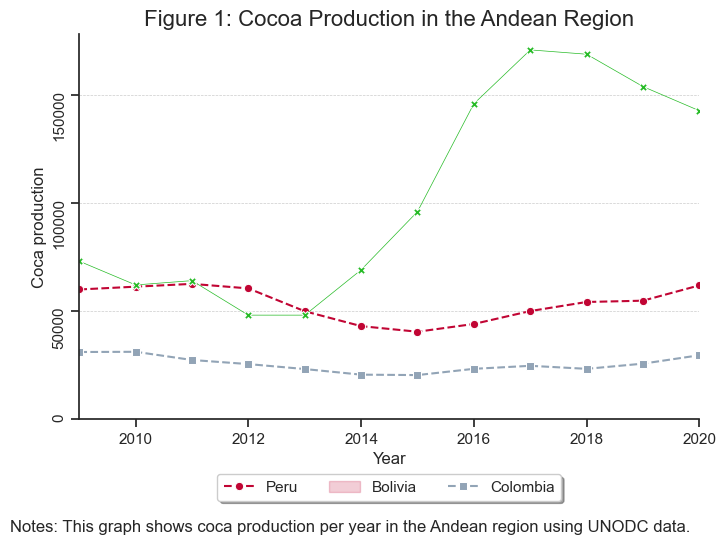

In [4]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x= "year" , y= "Peru", data = datos, color="#c10534", marker = "o", legend=False, linestyle='--')
sns.lineplot(x= "year" , y= "Bolivia", data = datos, color="#92a4b6", marker = "s", legend=False, linestyle = '--')
sns.lineplot(x= "year" , y= "Colombia", data = datos, color="#26bb26", marker = "X", legend=False, linewidth = 0.5)

ax.set_xmargin(0)  # drop espacios vacios right, left 
#ax.text(-0.5, -0.1, "Notes: This graph shows coca production per year in the Andean region using UNODC data.", color = 'black', ha='center', va='center')
plt.xlabel('Year')
plt.ylabel('Coca production')
plt.title("Figure 1: Cocoa Production in the Andean Region", size = 16)

#Leyenda
plt.legend( labels = ["Peru", "Bolivia", "Colombia"], loc='upper center', bbox_to_anchor=(0.5, -0.125),
           fancybox=True, shadow=True, ncol=5)

#Rango valores en los ejes
ax.set_yticks(range(0,200000,50000))
plt.yticks(rotation=90)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

#Añadimos notas debajo del gráfico
ax.text(16000, -50000, "Notes: This graph shows coca production per year in the Andean region using UNODC data.", ha='center', va='center')

In [5]:
#Leer el excel
xlsx = pd.read_excel("../../data/produccion_coca/6.1.2_-_Eradication_of_coca_bush.xlsx")
xlsx

,Unnamed: 0,Unnamed: 1,"Reported eradication of coca bush, 2009-2020",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,Method of eradication,Unit,2009.00,2010.00,2011.00,2012.00,2013.000,2014.0000,2015.000,2016.0,2017.00,2018.00,2019.00,2020.00,source 2020
1,NaN,NaN,Bolivia (Plurinational State of),manual,hectare,6341.00,8200.00,10509.00,11044.00,11407.000,11144.0000,11020.000,6577.0,7237.00,11174.00,9205.00,2177.00,https://www.unodc.org/documents/crop-monitorin...
2,NaN,NaN,Colombia,manual,hectare,165336.95,145743.69,138503.23,131004.75,69173.469,67234.5178,49967.463,17642.0,52000.67,59977.95,94606.00,130147.33,ARQ2020
3,NaN,NaN,Peru,manual,hectare,10025.00,12033.00,10290.00,14171.00,23785.000,31206.0000,35868.000,30151.0,25784.00,25106.67,25526.31,6272.80,ARQ2020
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Source: United Nations Office on Drugs and Cri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Nos quedamos solo con las columnas y filas con datos de los países.
bbdd= xlsx.loc[[1,2,3],:]
bbdd= bbdd.iloc[:, 5:17]

#Transponemos la dataframe para luego poner una columna con los años (en formato fecha)
bbdd= bbdd.transpose()
bbdd= bbdd.rename(columns = {1:"Bolivia", 2:"Colombia", 3:"Peru"})
bbdd['year'] = pd.to_datetime(range(2009, 2021), format='%Y')
bbdd.reset_index(drop = True, inplace = True)
bbdd

,Bolivia,Colombia,Peru,year
0,6341.0,165336.9500,10025.00,2009-01-01
1,8200.0,145743.6900,12033.00,2010-01-01
2,10509.0,138503.2300,10290.00,2011-01-01
3,11044.0,131004.7500,14171.00,2012-01-01
4,11407.0,69173.4690,23785.00,2013-01-01
5,11144.0,67234.5178,31206.00,2014-01-01
6,11020.0,49967.4630,35868.00,2015-01-01
7,6577.0,17642.0000,30151.00,2016-01-01
8,7237.0,52000.6700,25784.00,2017-01-01
9,11174.0,59977.9500,25106.67,2018-01-01


Text(16000, -60000, 'Notes: This graph shows coca erradication per year in the Andean region using UNODC data.')

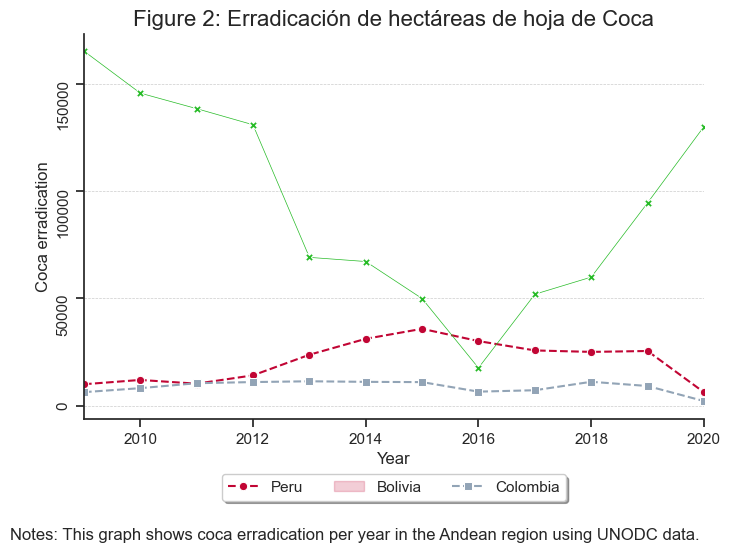

In [7]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x= "year" , y= "Peru", data = bbdd, color="#c10534", marker = "o", legend=False, linestyle='--')
sns.lineplot(x= "year" , y= "Bolivia", data = bbdd, color="#92a4b6", marker = "s", legend=False, linestyle = '--')
sns.lineplot(x= "year" , y= "Colombia", data = bbdd, color="#26bb26", marker = "X", legend=False, linewidth = 0.5)

ax.set_xmargin(0)  # drop espacios vacios right, left 
plt.xlabel('Year')
plt.ylabel('Coca erradication')
plt.title("Figure 2: Erradicación de hectáreas de hoja de Coca", size = 16)

#Leyenda
plt.legend( labels = ["Peru", "Bolivia", "Colombia"], loc='upper center', bbox_to_anchor=(0.5, -0.125),
           fancybox=True, shadow=True, ncol=5)

#Rango valores en los ejes
ax.set_yticks(range(0,200000,50000))
plt.yticks(rotation=90)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

#Añadimos notas debajo del gráfico
ax.text(16000, -60000, "Notes: This graph shows coca erradication per year in the Andean region using UNODC data.", ha='center', va='center')

### Producción y erradicación de hoja de coca en el Perú

Text(16000, -40000, 'Notes: This graph shows coca production and erradication per year in the Peru using UNODC data.')

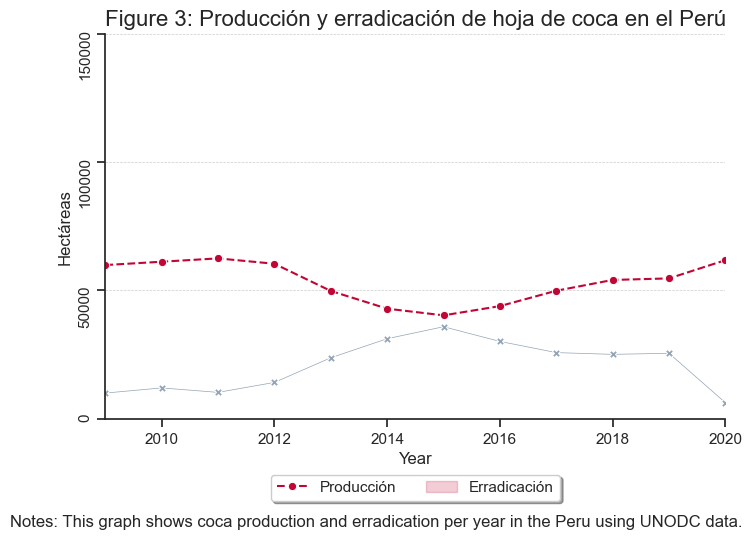

In [8]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x= "year" , y= "Peru", data = datos, color="#c10534", marker = "o", legend=False, linestyle='--')
sns.lineplot(x= "year" , y= "Peru", data = bbdd, color="#92a4b6", marker = "X", legend=False, linewidth = 0.5)

ax.set_xmargin(0)  # drop espacios vacios right, left 
plt.xlabel('Year')
plt.ylabel('Hectáreas')
plt.title("Figure 3: Producción y erradicación de hoja de coca en el Perú", size = 16)

#Leyenda
plt.legend( labels = ["Producción", "Erradicación"], loc='upper center', bbox_to_anchor=(0.5, -0.125),
           fancybox=True, shadow=True, ncol=5)

#Rango valores en los ejes
ax.set_yticks(range(0,200000,50000))
plt.yticks(rotation=90)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

#Añadimos notas debajo del gráfico
ax.text(16000, -40000, "Notes: This graph shows coca production and erradication per year in the Peru using UNODC data.", ha='center', va='center')

## Parte 2

### Metropolitano

In [9]:
# Subiendo la base de datos
data = pd.read_excel("../../data/metropolitano.xlsx")
# Visualizando los datos
data

,id,id_transport,cod_district,district,transport_type,station_name,sur_latitud,oeste_longitud
0,1,1,150112.0,independencia,metropolitano,E. NARANJAL,"11°58'51.19""S","77° 3'31.63""O"
1,2,1,150112.0,independencia,metropolitano,IZAGUIRRE,"11°59'22.96""S","77° 3'25.30""O"
2,3,1,150112.0,independencia,metropolitano,PACIFICO E1,"11°59'41.19""S","77° 3'21.84""O"
3,4,1,150112.0,independencia,metropolitano,INDEPENDENCIA E1,"11°59'55.00""S","77° 3'18.79""O"
4,5,1,150112.0,independencia,metropolitano,JAZMINES E1,"12° 0'7.88""S","77° 3'17.16""O"
...,...,...,...,...,...,...,...,...
135,154,1,NaN,NaN,alimentador_8,ABTAO,"12° 3'28.98""S","77° 1'20.22""O"
136,155,1,NaN,NaN,alimentador_8,ANDAHUAYLAS,"12° 3'30.81""S","77° 1'34.43""O"
137,156,1,NaN,NaN,alimentador_8,ABANCAY,"12° 3'32.80""S","77° 1'49.73""O"
138,157,1,NaN,NaN,alimentador_8,ESTACIÓN CENTRAL,"12° 3'30.64""S","77° 2'11.10""O"


In [10]:
data = data.copy()

In [11]:
def convert_gps(x):
        
    signo = -1 if re.search('[sSoO-]', x ) else 1
    #si la observacion tiene algo parecido a este s S  de sur o norte PONME 1
    regex = re.compile('[^\d+\s\.]') # Todo lo que sea diferente a digitos, especio y el punto
    #Usamos split, porque se quiere que se guarde en estos tres: 
    h, m , s = str.split( regex.sub(' ', x ) )
    #Tendremos como resultado 3 outcomes
    return signo*(float(h) + float(m)/60 + float(s)/3600)

In [12]:
# Información sobre longitud
data['longitud'] = data.oeste_longitud.map(convert_gps)

In [13]:
# longitud cambiada:
data['longitud']

0     -77.058786
1     -77.057028
2     -77.056067
3     -77.055219
4     -77.054767
         ...    
135   -77.022283
136   -77.026231
137   -77.030481
138   -77.036417
139   -77.017947
Name: longitud, Length: 140, dtype: float64

### Estudiantes 

In [14]:
# Subiendo la base de datos
data = pd.read_excel("../../data/estudiantes/base_students.xlsx")
# Visualizando los datos
data

,NAME,BORN_DATE,AGE,TYPE_ADM_SCHOOL,GENDER,MAIL,DNI_NUMBER,observaciones
0,JOAN AYALA FERRERAS --- =9,"23 /08/1998 ""#%",!#10,publico,M ALEE,albatros001@wandoo.es,dni padre: 04-156597865,nombre correcto es Roberto daga rios
1,JOAN 3 BAEZ TEJADO,22/02/2004 !,15,privade,mal,albert@intercom.es,dni padre: 02-156597865,NaN
2,MARC BASTARDES SOTO -,05 /01/1998,****14,public0,malllle,alien_10@intercom.es,01-156597872,edad correta es 15
3,JOSEP ANGUERA VILAFRANCA,21/02/1999,16,public,mal ee,amores@hotmail.com,dni madre 01-156597872,NaN
4,JOAN ANDREU CRUZ /,27/06/1982 00:00,15,public,m al,anabel@altecom.es,01-156597872,NaN
5,JORDI RAYA 73738 )= GAVILAN,15/06/1991,17,publico,maleeee,antig56a@minorisa.es,dni padre: 01-156597865,"Beneficiado del programa Juntos, tiene 4 hermanos"
6,********** ARAN ALVAREZ FERNÁNDEZ,03/09 /1993,!12,public,malllle,ballador_rios@hotmail.com,dni madre 01-156597872,NaN
7,JAVIER BENITEZ JOSE3,18/02/1975,11,public,malllle,balladora@altecom.es,dni madre 01-156597872,asiste a una II.EE de jornada completa
8,MARIO PASCUAL FLORES,14/11/1986 00:00,8,privde,malll le,barbilla@hotmail.com,dni madre 01-156597872,NaN
9,JESUS AYALA TORNÉ,16/08/1993,9,prvade,male,besugo13@minorisa.es,dni padre: 02-156597865,"nombre correcto es Jesus Mendieta Jimenez, asi..."


In [15]:
data = data.copy()

In [16]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'born_date', 'age', 'type_adm_school', 'gender', 'mail',
       'dni_number', 'observaciones'],
      dtype='object')

#### Limpiar el nombre de los estudiantes

In [17]:
# Analizamos la información correspondiente a nombre (name)
data['name']

0               JOAN AYALA FERRERAS --- =9
1                       JOAN 3 BAEZ TEJADO
2                    MARC BASTARDES SOTO -
3                 JOSEP ANGUERA VILAFRANCA
4                       JOAN ANDREU CRUZ /
5              JORDI RAYA 73738 )= GAVILAN
6        ********** ARAN ALVAREZ FERNÁNDEZ
7                     JAVIER BENITEZ JOSE3
8                     MARIO PASCUAL FLORES
9                        JESUS AYALA TORNÉ
10         GEMMA 234 >_ LISTAN FIGUERAS .0
11                   SILVIA RASERO GAVILAN
12                  ALBERT ARNALOT PUIG !2
13                   MARIA MOLINER GARRIDO
14             BERTA GALOBART .--56 GARCIA
15                BERTA LÓPEZ GARRIGASSAIT
16                    MIREIA SÁNCHEZ GÓMEZ
17                    GEMMA ALAVEDRA SUNYÉ
18             MARIA ISABEL ALIGUÉ BONVEHÍ
19                       TONI MAS FRANCH .
20                   ALEJANDRO ALOY COMPTE
21                 JOAN MARTÍ ASENSIO VEGA
22                 CARLOS ACUÑA TORT--{{++
23    DAVID

In [18]:
# Limpiar el nombre de los estudiantes
regex = re.compile('[^a-zA-Z\s]')

data['name'] = data['name'].apply(lambda x: regex.sub('',x).strip())
data['name']

0               JOAN AYALA FERRERAS
1                 JOAN  BAEZ TEJADO
2               MARC BASTARDES SOTO
3          JOSEP ANGUERA VILAFRANCA
4                  JOAN ANDREU CRUZ
5              JORDI RAYA   GAVILAN
6             ARAN ALVAREZ FERNNDEZ
7               JAVIER BENITEZ JOSE
8              MARIO PASCUAL FLORES
9                  JESUS AYALA TORN
10          GEMMA   LISTAN FIGUERAS
11            SILVIA RASERO GAVILAN
12              ALBERT ARNALOT PUIG
13            MARIA MOLINER GARRIDO
14           BERTA GALOBART  GARCIA
15          BERTA LPEZ GARRIGASSAIT
16               MIREIA SNCHEZ GMEZ
17              GEMMA ALAVEDRA SUNY
18        MARIA ISABEL ALIGU BONVEH
19                  TONI MAS FRANCH
20            ALEJANDRO ALOY COMPTE
21           JOAN MART ASENSIO VEGA
22                 CARLOS ACUA TORT
23             DAVID   ALGU TRANCHO
24          CRISTINA BADIA CASTILLO
25    JULIO ALBERTO  BENITEZ FLORES
26          CRISTINA ARISSA HERMOSO
27        JOS ANTONIO BARALD

####  Limpiar la fecha de nacimiento y edad

In [19]:
#Información de la fecha de nacimiento:
data['born_date']

0     23   /08/1998 "#%
1          22/02/2004 !
2         05   /01/1998
3            21/02/1999
4      27/06/1982 00:00
5            15/06/1991
6         03/09   /1993
7            18/02/1975
8      14/11/1986 00:00
9            16/08/1993
10           16/07/1992
11            100:00:00
12        18/03/2   001
13           28/08/2000
14           22/03/1973
15           19/05/1998
16     28/11/1982 00:00
17        02/01#6)/1992
18           13/01/2000
19           26/03/1995
20     05/01/1989 00:00
21           08/03/2003
22           03/07/1979
23           18/10/1995
24       08/0    2/1990
25     26/09/1977 00:00
26           16/04/2000
27        05/05   /1982
28           27/01/1999
29           18/10/1995
30             00/00/00
31            1/10/2004
32           18/12/1998
33           18/10/1999
34           18/06/2000
35     18/10/1996 -----
36           18/05/1997
37            4/10/2003
38           18/10/2004
39           31/05/1999
40      1     8/10/2006
41           10/

In [20]:
#Limpiando la fecha de nacimiento
regex = re.compile('\s*|00:00|["#%!)-]|00/00/00|(100:00:00)$|(000000)$|[1]#|(nan)$')

data['born_date1'] = data['born_date'].apply(lambda x: regex.sub('',str(x)).strip())
data['born_date1']

0     23/08/1998
1     22/02/2004
2     05/01/1998
3     21/02/1999
4     27/06/1982
5     15/06/1991
6     03/09/1993
7     18/02/1975
8     14/11/1986
9     16/08/1993
10    16/07/1992
11              
12    18/03/2001
13    28/08/2000
14    22/03/1973
15    19/05/1998
16    28/11/1982
17    02/06/1992
18    13/01/2000
19    26/03/1995
20    05/01/1989
21    08/03/2003
22    03/07/1979
23    18/10/1995
24    08/02/1990
25    26/09/1977
26    16/04/2000
27    05/05/1982
28    27/01/1999
29    18/10/1995
30              
31     1/10/2004
32    18/12/1998
33    18/10/1999
34    18/06/2000
35    18/10/1996
36    18/05/1997
37     4/10/2003
38    18/10/2004
39    31/05/1999
40    18/10/2006
41    10/01/2003
42    18/10/2008
43    18/04/2010
44              
45              
46    18/10/2012
47    18/12/2005
Name: born_date1, dtype: object

In [21]:
#Asignando el formato date
data['fecha_nacimiento'] = pd.to_datetime(data['born_date1']
                                             , dayfirst = True).dt.strftime('%d/%m/%Y')

In [22]:
#Observando los resultados
data['fecha_nacimiento']

0     23/08/1998
1     22/02/2004
2     05/01/1998
3     21/02/1999
4     27/06/1982
5     15/06/1991
6     03/09/1993
7     18/02/1975
8     14/11/1986
9     16/08/1993
10    16/07/1992
11           NaN
12    18/03/2001
13    28/08/2000
14    22/03/1973
15    19/05/1998
16    28/11/1982
17    02/06/1992
18    13/01/2000
19    26/03/1995
20    05/01/1989
21    08/03/2003
22    03/07/1979
23    18/10/1995
24    08/02/1990
25    26/09/1977
26    16/04/2000
27    05/05/1982
28    27/01/1999
29    18/10/1995
30           NaN
31    01/10/2004
32    18/12/1998
33    18/10/1999
34    18/06/2000
35    18/10/1996
36    18/05/1997
37    04/10/2003
38    18/10/2004
39    31/05/1999
40    18/10/2006
41    10/01/2003
42    18/10/2008
43    18/04/2010
44           NaN
45           NaN
46    18/10/2012
47    18/12/2005
Name: fecha_nacimiento, dtype: object

In [23]:
#extrayendo año de nacimiento 
regex = re.compile('\d{2}/\d{2}/')

data['año'] = data['fecha_nacimiento'].apply(lambda x: regex.sub('',str(x)).strip())
data['año']

0     1998
1     2004
2     1998
3     1999
4     1982
5     1991
6     1993
7     1975
8     1986
9     1993
10    1992
11     nan
12    2001
13    2000
14    1973
15    1998
16    1982
17    1992
18    2000
19    1995
20    1989
21    2003
22    1979
23    1995
24    1990
25    1977
26    2000
27    1982
28    1999
29    1995
30     nan
31    2004
32    1998
33    1999
34    2000
35    1996
36    1997
37    2003
38    2004
39    1999
40    2006
41    2003
42    2008
43    2010
44     nan
45     nan
46    2012
47    2005
Name: año, dtype: object

In [24]:
# Información de edad:
data['age']

0               !#10
1                 15
2             ****14
3                 16
4                 15
5                 17
6                !12
7                 11
8                  8
9                  9
10             1   1
11            1   3 
12                 6
13                 7
14                 6
15                 5
16                 7
17              28..
18                14
19        16 --{{%/%
20                15
21                16
22                14
23            999999
24    dice tener 11 
25                13
26                20
27                14
28              && 7
29                15
30                14
31             99999
32                12
33                11
34                10
35                14
36                13
37                 7
38                 6
39                11
40                 4
41                 7
42                12
43                10
44              ----
45                15
46                 8
47           

In [25]:
# Limpiando la edad
regex = re.compile('\D|[0-9]{3,}')

data['age'] = data['age'].apply(lambda x: regex.sub('',str(x)).strip())
data['age']

0     10
1     15
2     14
3     16
4     15
5     17
6     12
7     11
8      8
9      9
10    11
11    13
12     6
13     7
14     6
15     5
16     7
17    28
18    14
19    16
20    15
21    16
22    14
23      
24    11
25    13
26    20
27    14
28     7
29    15
30    14
31      
32    12
33    11
34    10
35    14
36    13
37     7
38     6
39    11
40     4
41     7
42    12
43    10
44      
45    15
46     8
47    10
Name: age, dtype: object

#### Variable GENDER y administración de la escuela

In [26]:
# Información de GENDER:
data['gender']

0       M    ALEE
1             mal
2         malllle
3          mal ee
4           m  al
5         maleeee
6         malllle
7         malllle
8       malll  le
9            male
10         female
11         female
12           mmle
13         female
14      femmallee
15          femae
16         female
17          fmale
18        ffemale
19           male
20         maaale
21        maleeee
22        maleeee
23        maleeee
24        femmale
25           male
26        femmale
27           male
28           male
29           male
30           male
31           fele
32           male
33           male
34            mle
35          ma le
36          feale
37           male
38          ma le
39            mle
40           male
41           male
42          maloo
43            NaN
44        fe m le
45          fmale
46    f  emaleeee
47        fm  ale
Name: gender, dtype: object

In [27]:
# Creación de la variable Dummy gender
# 0: no pertenece
# 1: si pertenece

data['GENDER'] =  np.where(data['gender'].str.contains('^f|^F', regex=True, na = False),
                            1,
                            0)
data['GENDER']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    0
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    1
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    1
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    1
45    1
46    1
47    1
Name: GENDER, dtype: int32

In [28]:
# Información del tipo de escuela
data['type_adm_school']

0            publico
1            privade
2            public0
3             public
4             public
5            publico
6             public
7             public
8             privde
9             prvade
10            public
11             pblic
12            public
13           privade
14           publico
15       Public  ooo
16           privade
17           privade
18           publicp
19               NaN
20           privade
21           miembro
22            public
23            public
24            public
25            public
26           privade
27           public0
28            public
29            public
30           private
31           privade
32    publicoooooooo
33           public0
34           privade
35            public
36          pu  blic
37            public
38          publllic
39           privado
40           privade
41           privade
42            public
43           pribado
44           privade
45            public
46            public
47           

In [29]:
# Creación de la variable Dummy público
# 0: no pertenece
# 1: si pertenece
data['PUBLICO'] =  np.where(data['type_adm_school'].str.contains('^Pub|^pub', regex=True, na = False),
                            1,
                            0)
data['PUBLICO']

0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    1
16    0
17    0
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    1
28    1
29    1
30    0
31    0
32    1
33    1
34    0
35    1
36    0
37    1
38    1
39    0
40    0
41    0
42    1
43    0
44    0
45    1
46    1
47    1
Name: PUBLICO, dtype: int32

#### Variable usuario

In [30]:
# Información de mail:
data['mail']

0         albatros001@wandoo.es
1            albert@intercom.es
2          alien_10@intercom.es
3            amores@hotmail.com
4             anabel@altecom.es
5          antig56a@minorisa.es
6     ballador_rios@hotmail.com
7          balladora@altecom.es
8          barbilla@hotmail.com
9          besugo13@minorisa.es
10              bogart@terra.es
11                bond@terra.es
12        carretero@intercom.es
13              cela@altecom.es
14             coco@hotmail.com
15         conejo11@minorisa.es
16            corcel@altecom.es
17           dorada@intercom.es
18             elisa@altecom.es
19          encarna@hotmail.com
20            entesa@altecom.es
21          groucho@intercom.es
22            harpo@hotmail.com
23      hispa@cataloniamail.com
24            madonna@wandoo.es
25        mata_hari@intercom.es
26          melanie@minorisa.es
27       melquíades@hotmail.com
28      abogados_15@hotmail.com
29                bond@terra.es
30             garcia@gmail.com
31      

In [31]:
# Definimos nuestra nueva variable usuario
def usuario(x):
    try:
        match_regex = re.compile('(\w+)@')
        match = match_regex.search(str(x))
        return match.group(1)
    except: 
        None

In [32]:
# Extrayendo el usuario de la columna mail
data['usuario'] = data['mail'].apply(lambda x: usuario(x))
data['usuario']

0        albatros001
1             albert
2           alien_10
3             amores
4             anabel
5           antig56a
6      ballador_rios
7          balladora
8           barbilla
9           besugo13
10            bogart
11              bond
12         carretero
13              cela
14              coco
15          conejo11
16            corcel
17            dorada
18             elisa
19           encarna
20            entesa
21           groucho
22             harpo
23             hispa
24           madonna
25         mata_hari
26           melanie
27        melquíades
28       abogados_15
29              bond
30            garcia
31             diana
32    torresmarquina
33        pdominguez
34       satur_seb15
35           mendoda
36     palomino_rios
37           mendoda
38               jmg
39             tazoj
40       gon_melchor
41           mendoda
42               jmv
43           mflores
44          brios100
45           mendoda
46         jaqumatos
47           

#### Variable DNI

In [33]:
# Información de DNI:
data['dni_number']

0        dni padre: 04-156597865
1        dni padre: 02-156597865
2                   01-156597872
3         dni madre 01-156597872
4                   01-156597872
5        dni padre: 01-156597865
6         dni madre 01-156597872
7         dni madre 01-156597872
8         dni madre 01-156597872
9        dni padre: 02-156597865
10    dni apoderado 01-156597898
11                  01-156597898
12        dni madre 01-156597872
13        dni madre 01-156597872
14        dni madre 01-156597872
15                  01-156597872
16        dni madre 01-156597872
17        dni madre 01-156597872
18        dni madre 01-156597872
19        dni madre 01-156597872
20       dni padre: 01-156597865
21        dni madre 01-156597872
22    dni apoderado 01-156597898
23    dni apoderado 01-156597898
24    dni apoderado 01-156597898
25                  01-156597898
26    dni apoderado 01-156597898
27    dni apoderado 01-156597898
28    dni apoderado 01-156597898
29        dni madre 01-156597872
30       d

In [34]:
# Definimos nuestra nueva variable DNI
def DNI(x):
    try:
        match_regex = re.compile('(\d+\-\d+)')
        match = match_regex.search(str(x))
        return match.group(1)
    except: 
        None

In [35]:
# Extrayendo el usuario de la columna mail
data['DNI'] = data['dni_number'].apply(lambda x: DNI(x))
data['DNI']

0     04-156597865
1     02-156597865
2     01-156597872
3     01-156597872
4     01-156597872
5     01-156597865
6     01-156597872
7     01-156597872
8     01-156597872
9     02-156597865
10    01-156597898
11    01-156597898
12    01-156597872
13    01-156597872
14    01-156597872
15    01-156597872
16    01-156597872
17    01-156597872
18    01-156597872
19    01-156597872
20    01-156597865
21    01-156597872
22    01-156597898
23    01-156597898
24    01-156597898
25    01-156597898
26    01-156597898
27    01-156597898
28    01-156597898
29    01-156597872
30    03-156597865
31    01-156597872
32    02-156597865
33    01-156597898
34    02-156597865
35    01-156597898
36    03-156597865
37    01-156597898
38    01-156597872
39    01-156597865
40    01-156597898
41    01-156597872
42    02-156597865
43    02-156597865
44    02-156597865
45    01-156597872
46    01-156597898
47    01-156597898
Name: DNI, dtype: object

#### Variable observaciones

##### Recuperar el nombre y edad correctos

In [36]:
# Para recuperar nombre
def obs_info(x):
    try:
        regex_area = re.compile('nombre correcto es ([A-Za-z\s]*)')
        output =  regex_area.search(x)
  #para que no salga ningun tipo de error se agrega *: ningun match o más de un match.  
        return output.group(1)
    except:
        None

In [37]:
data['nombre'] = data['observaciones'].apply(lambda x:obs_info(x))
data['nombre']

0          Roberto daga rios
1                       None
2                       None
3                       None
4                       None
5                       None
6                       None
7                       None
8                       None
9     Jesus Mendieta Jimenez
10                      None
11                      None
12                      None
13    Fanny Cienfuegos prado
14                      None
15                      None
16                      None
17                      None
18                      None
19                      None
20             Paul Castillo
21                      None
22                      None
23                      None
24                      None
25                      None
26                      None
27                      None
28                      None
29                      None
30                      None
31                      None
32                      None
33                      None
34            

In [38]:
# Para recuperar edad
def obs_info1(x):
    
    try:
        regex_area = re.compile('es ([0-9]+)')
        output =  regex_area.search(x)
  #para que no salga ningun tipo de error se agrega *: ningun match o más de un match.  
        return output.group(1)
    
    except:
        
        None

In [39]:
data['edad'] = data['observaciones'].apply(lambda x:obs_info1(x))
data['edad']

0     None
1     None
2       15
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27      15
28    None
29    None
30    None
31    None
32       8
33    None
34    None
35    None
36    None
37    None
38    None
39      10
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
Name: edad, dtype: object

In [40]:
# Reemplazando nombre correcto
data.loc[data['nombre'].notna(), 'name'] = data.loc[data['nombre'].notna(), 'nombre']
data['name']

0                 Roberto daga rios
1                 JOAN  BAEZ TEJADO
2               MARC BASTARDES SOTO
3          JOSEP ANGUERA VILAFRANCA
4                  JOAN ANDREU CRUZ
5              JORDI RAYA   GAVILAN
6             ARAN ALVAREZ FERNNDEZ
7               JAVIER BENITEZ JOSE
8              MARIO PASCUAL FLORES
9            Jesus Mendieta Jimenez
10          GEMMA   LISTAN FIGUERAS
11            SILVIA RASERO GAVILAN
12              ALBERT ARNALOT PUIG
13           Fanny Cienfuegos prado
14           BERTA GALOBART  GARCIA
15          BERTA LPEZ GARRIGASSAIT
16               MIREIA SNCHEZ GMEZ
17              GEMMA ALAVEDRA SUNY
18        MARIA ISABEL ALIGU BONVEH
19                  TONI MAS FRANCH
20                    Paul Castillo
21           JOAN MART ASENSIO VEGA
22                 CARLOS ACUA TORT
23             DAVID   ALGU TRANCHO
24          CRISTINA BADIA CASTILLO
25    JULIO ALBERTO  BENITEZ FLORES
26          CRISTINA ARISSA HERMOSO
27        JOS ANTONIO BARALD

In [41]:
# Reemplazando edad correcta
data.loc[data['edad'].notna(), 'age'] = data.loc[data['edad'].notna(), 'age']
data['age']

0     10
1     15
2     14
3     16
4     15
5     17
6     12
7     11
8      8
9      9
10    11
11    13
12     6
13     7
14     6
15     5
16     7
17    28
18    14
19    16
20    15
21    16
22    14
23      
24    11
25    13
26    20
27    14
28     7
29    15
30    14
31      
32    12
33    11
34    10
35    14
36    13
37     7
38     6
39    11
40     4
41     7
42    12
43    10
44      
45    15
46     8
47    10
Name: age, dtype: object

##### Crear una variable con la cantidad de hermana/os del estudiante

In [42]:
# Para identificar número de hermanos
def obs_info2(x):
    
    try:
        regex_area = re.compile('tiene ([0-9]+)')
        output =  regex_area.search(x)
  #para que no salga ningun tipo de error se agrega *: ningun match o más de un match.  
        return output.group(1)
    
    except:
        
        None

In [43]:
data['num_hermanos'] = data['observaciones'].apply(lambda x:obs_info2(x))
data['num_hermanos']

0     None
1     None
2     None
3     None
4     None
5        4
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15       4
16    None
17       1
18    None
19    None
20    None
21    None
22    None
23       2
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47       2
Name: num_hermanos, dtype: object

##### Crear una variable dummy

In [44]:
# Creación de la variable Dummy si pertenece al programa juntos
# 0: no pertenece
# 1: si pertenece
data['juntos'] =  np.where(data['observaciones'].str.contains('[J/j]untos', regex=True, na = False),
                            1,
                            0)
data['juntos']

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    1
30    0
31    0
32    1
33    0
34    1
35    0
36    0
37    0
38    0
39    0
40    0
41    1
42    0
43    0
44    1
45    0
46    0
47    0
Name: juntos, dtype: int32